# Домашнее задание 3

### Задание 1

**a)** В данном случае регрессором X являются значения переменной HP, а откликом Y $-$ значения переменной MPG. Простая линейная регрессия имеет вид: $r(x) = \beta_0 + \beta_1 x$. Можно оценить $\hat r(x) = \hat \beta_0 + \hat \beta_1 x$, где согласно лекции оценки

$$\hat \beta_1 = \dfrac{\sum\limits^N_{i=1}(X_i - \overline X_n)(Y_i - \overline Y_n)}{\sum\limits^N_{i=1}(X_i - \overline X_n)^2}$$

$$\hat \beta_0 = \overline Y_n - \hat \beta_1 \overline X_n$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("data.txt", delim_whitespace=True)
data.head()

,MAKE/MODEL,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0


Регрессионная зависимость: r(x) = 50.0660780702-0.139023258903x


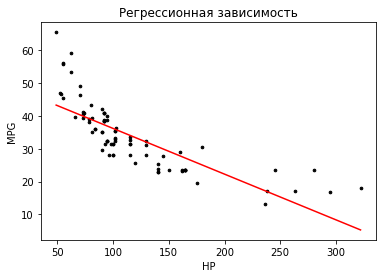

In [3]:
X = np.array(data['HP'])
Y = np.array(data['MPG'])

# вычислим оценки коэффициентов по формулам выше
b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean())**2)
b0 = Y.mean() - b1 * X.mean()
print("Регрессионная зависимость: r(x) = " + str(b0) + str(b1) + "x")

plt.scatter(X, Y, c='k', s=7)

xx = np.linspace(X.min(), X.max(), )
yy = b0 + b1 * xx
plt.plot(xx, yy, 'r-')
plt.title(u'Регрессионная зависимость')
plt.xlabel('HP')
plt.ylabel('MPG')

Видим, что прямая неплохо приближает большинство точек выборки, однако зависимость далека от линейной, поэтому у нескольких точек наблюдается большое отклонение от построенной регрессией прямой.

**b)** Построем стандартную линейную регрессию аналогично предыдущему пункту, используя $\log (MPG)$ в качестве отклика.

Регрессионная зависимость: r(x) = 4.01322939993-0.00458889589541x


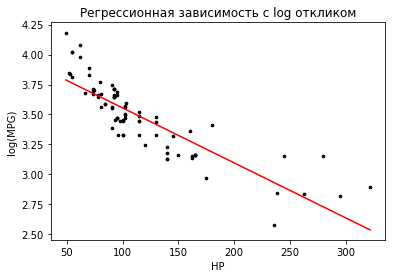

In [4]:
Y_log = np.log(Y)

# вычислим оценки коэффициентов по формулам выше
b1_log = np.sum((X - X.mean()) * (Y_log  - Y_log .mean())) / np.sum((X - X.mean())**2)
b0_log = Y_log.mean() - b1_log * X.mean()
print("Регрессионная зависимость: r(x) = " + str(b0_log) + str(b1_log) + "x")

plt.scatter(X, Y_log, c='k', s=7)

xx = np.linspace(X.min(), X.max(), )
yy_log = b0_log + b1_log * xx
plt.plot(xx, yy_log, 'r-')
plt.title(u'Регрессионная зависимость c log откликом')
plt.xlabel('HP')
plt.ylabel('log(MPG)')

Построим также полученную зависимость MPG от HP, чтобы можно было сравнить с предыдущим пунктом (для этого рассмотрим экспоненту от прогнозов).

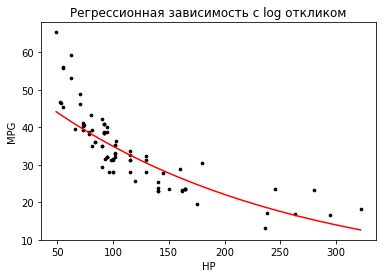

In [5]:
plt.scatter(X, Y, c='k', s=7)
yy_log = np.exp(b0_log + b1_log * xx)
plt.plot(xx, yy_log, 'r-')
plt.title(u'Регрессионная зависимость с log откликом')
plt.xlabel('HP')
plt.ylabel('MPG')

Сумма квадратов остатков подгонки оценивается $RSS = \sum\limits^n_{i=1}\hat \varepsilon_i^2 = \sum\limits^n_{i=1} (Y_i - (\hat \beta_0 + \hat \beta_1 X_i))^2$

In [6]:
RSS = np.sum((Y - (b0 + b1 * X))**2)
RSS_log = np.sum((Y - np.exp(b0_log + b1_log * X))**2)
print("RSS из пункта а: ", RSS)
print("RSS из пункта b: ", RSS_log)

RSS из пункта а:  3049.43511117
RSS из пункта b:  2378.36267487


Cогласно данной метрике качество во втором пункте лучше. Это подтверждается и визуально.

**с)** Для множественной регрессии данные имеют вид $(X_1, Y_1), ... ,(X_n, Y_n)$, где $X_i = (X_{i1}, ..., X_{ik}) \in \mathbb{R}^k$. Для учета нулевого коэффициента обычно полагают $X_{i1} = 1$ при $i = 1, ..., n$.

По теореме из лекции оценка функции регрессии имеет вид: $\hat r(x) = \sum\limits^k_{j=1} \hat\beta_j x_j$, где $\hat \beta = (X^{T}X)^{-1}X^{T}Y$.

In [7]:
X = (np.ones(Y.size), np.array(data['VOL']), np.array(data['HP']), np.array(data['SP']), np.array(data['WT']))
X = np.column_stack(X)
Y = np.array(data['MPG'])

b = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
print("Веса b:", b)

Веса b: [  1.92437753e+02  -1.56450113e-02   3.92212315e-01  -1.29481848e+00
  -1.85980373e+00]


Найдем тут также $R_{tr} = \sum\limits^n_{i=1}\hat \varepsilon_i^2$ (оценку риска прогноза), где вектор остатков $\hat \varepsilon = X \hat \beta- Y$

In [8]:
R_tr = np.sum((np.dot(X, b) - Y)**2)
print("R_tr = ", R_tr)

R_tr =  1027.38147725


Видим, что в случае множественной регрессии отклонение (сумма квадратов остатков) стало в 2-3 раза меньше, чем для простой, что вполне соответсвует ожиданиям.

**d)** Статистика $C_p$ Mallow для выбранного подмножества регрессоров $S$ имеет вид $\hat R(S) = \hat R_{tr}(S) + 2|S|\hat \sigma^2$. Здесь $|S|$ - число регрессорова, а $\hat \sigma^2$ - оценка дисперсии шума $\sigma^2$, полученная по полной модели.

По теореме из лекции $\hat \sigma^2 = \dfrac1{n - k} \sum\limits^n_{i=1}\hat \varepsilon_i^2$.

Существуют два способа выбора метода моделей: включений и исключений.

    1) Включения

На первом шаге регрессоров нет вообще;

Далее добавляется регрессор, для которого $C_p$ Mallow минимальное и т.д.

    2) Исключения

На первом шаге количество регрессоров максимальное;

На каждом шаге удаляется регрессор, исключение которого приводит к минимальному значению $C_p$ Mallow.

In [9]:
# Выберем сначала модель по методу включений

k = 5 # т.к. в полной модели вектора из пространства R^5
Regr = [np.ones(Y.size), np.array(data['VOL']), np.array(data['HP']), np.array(data['SP']), np.array(data['WT'])]
S = []
sig = R_tr/(Y.size - k)

C_p = np.infty
ind = 10

while (ind >= 0):  # ind - добавляемый на данном шаге индекс
    if ind != 10 and ind >= 0:
        S += [ind]
    ind = -1
    for i in range(k):
        if i not in S:
            S_cur = S[:] + [i]
            X = []
            for el in S_cur:
                X += [Regr[el]]
            X = np.column_stack(X)  # столбцы, соответствующие индексам в S_cur
            b = np.dot(np.dot(np.linalg.inv(np.dot(X.T,  X)), X.T), Y)
            C_p_cur = np.sum((np.dot(X, b) - Y)**2) + 2 * len(S_cur) * sig
            if C_p_cur < C_p:
                C_p = C_p_cur
                ind = i
                
print('Полученное подмножество регрессоров: ', sorted(S))
print('C_p = ', C_p)

Полученное подмножество регрессоров:  [0, 2, 3, 4]
C_p =  1140.39087112


In [10]:
# Теперь построим модель по методу исключений

Regr = [np.ones(Y.size), np.array(data['VOL']), np.array(data['HP']), np.array(data['SP']), np.array(data['WT'])]
S = [0, 1, 2, 3, 4]
sig = R_tr/(Y.size - k)  # т.к. в полной модели вектора из пространства R^5

C_p = np.infty
ind = 10

while (ind >= 0):
    if ind != 10 and ind >= 0:
        S.remove(ind)
    ind = -1
    for i in S:
        S_cur = S[:]
        S_cur.remove(i)
        X = []
        for el in S_cur:
            X += [Regr[el]]
        X = np.column_stack(X)
        b = np.dot(np.dot(np.linalg.inv(np.dot(X.T,  X)), X.T), Y)
        C_p_cur = np.sum((np.dot(X, b) - Y)**2) + 2 * len(S_cur) * sig
        if C_p_cur < C_p:
            C_p = C_p_cur
            ind = i
                
print('Полученное подмножество регрессоров: ', sorted(S))
print('C_p = ', C_p)

Полученное подмножество регрессоров:  [0, 2, 3, 4]
C_p =  1140.39087112


Два данных метода вернули один и тот же результат - в качестве регрессоров нужно использовать все столбцы, кроме 'VOL'.

### Задание 2

Критерий AIC имеет вид $AIC(S) = l_S - |S| \rightarrow \max\limits_{S}$, где $l_S = l_S(\hat \beta)$ -  логарифм правдоподобия модели, где в качестве неизвестных параметров были подставлены их оценки, полученные с помощью максимизации $l_S(\beta)$.

Поскольку $\varepsilon \sim \mathcal{N}(0, \sigma^2)$, a $Y = X\beta + \varepsilon$, то $Y_i \sim \mathcal{N}(X_i \beta, \sigma^2)$. 

Пусть $X$ - выборка для фиксированного $S$. Тогда функция правдоподобия: $$\mathcal{L}_S(\beta) = \prod\limits^n_{i=1} p(Y_i) = \prod\limits^n_{i=1} \dfrac1{\sqrt{2 \pi \sigma^2}} \exp\left(-\dfrac{(Y_i - X_i \beta)^2}{2\sigma^2}\right) = \dfrac1{(2 \pi \sigma^2)^{n/2}} \prod\limits^n_{i=1} \exp\left(-\dfrac{(Y_i - X_i \beta)^2}{2\sigma^2}\right) \rightarrow \max\limits_\beta$$

Значит, логарифмическая функция правдоподобия:
$$l_S(\beta) = -\dfrac{n}{2}\ln(2\pi \sigma^2) - \dfrac1{2\sigma^2} \sum\limits^n_{i=1}(Y_i - X_i \beta)^2 = -\dfrac{n}{2}\ln(2\pi \sigma^2) - \dfrac1{2\sigma^2} \sum\limits^n_{i=1}\varepsilon_i^2 =$$$$= -\dfrac{n}{2}\ln(2\pi \sigma^2) - \dfrac1{2\sigma^2} R_{tr}(S) \rightarrow \max\limits_\beta$$

Таким образом, поскольку шум берется равным оценке, полученной по полной модели, $$AIC(S) = -\dfrac{n}{2}\ln(2\pi \hat\sigma^2) - \dfrac1{2\hat \sigma^2} \hat R_{tr}(S)- |S|$$

Поскольку $-\dfrac{n}{2}\ln(2\pi \hat\sigma^2)$ - известная константа, то максимизация данного критерия по $S$ эквивалетна минимизации $\dfrac1{2\hat \sigma^2} \hat R_{tr}(S) + |S|$, или, что то же самое, минимизации по $S$ статистики $\hat R_{tr}(S) + 2|S|\hat \sigma^2 = C_p$ Mallow, ЧТД.

### Задание 3

** а) ** 

Функция правдоподобия $$\mathcal{L}_n(\theta) = \prod\limits^n_{i=1} p(X_i) = \prod\limits^n_{i=1} \dfrac1{\sqrt{2 \pi}} e^{-(X_i - \theta)^2}$$

Логарифм функции правдоподобия $$l_n(\theta) = -\dfrac{n}{2}\ln(2\pi) - \dfrac1{2} \sum\limits^n_{i=1}(X_i - \theta)^2$$
$$\dfrac{\partial l_n}{\partial \theta} = \sum\limits^n_{i=1}(X_i - \theta) = n \overline X - n \theta$$
$$\dfrac{\partial^2 l_n}{\partial \theta^2} = -n < 0$$

Откуда MLE $\hat \theta = \overline X$.

Таким образом, $$P(J_n = 0) = P\left(l_n(0) - l_n(\hat \theta) + 1 > 0\right) = P\left(- \dfrac1{2} \sum\limits^n_{i=1}X_i^2 + \dfrac1{2} \sum\limits^n_{i=1}(X_i - \overline X)^2 + 1 > 0\right) =$$
$$= P\left(\sum\limits^n_{i=1}(- \overline X)(2 X_i - \overline X) + 2 > 0\right) = P\left(\overline X (2\sum\limits^n_{i=1}X_i - n\overline X) < 2 \right) = P\left(n\overline X ^2 < 2\right) =$$ $$= P\left(-\sqrt{2} < \sqrt{n}\overline X < \sqrt{2}\right) = P\left(\sqrt{n}\overline X < \sqrt{2}\right) - P\left(\sqrt{n}\overline X \leq -\sqrt{2}\right)$$

1) Если $M_0$ верна, то согласно ЦПТ $\sqrt{n} \overline X \xrightarrow[n \to \infty]{d} \mathcal{N}(0, 1)$.

Значит, $\lim \limits_{n \to \infty} P(J_n = 0) = Ф(\sqrt 2) - Ф(-\sqrt 2) = 2 Ф(\sqrt 2) - 1$, где $Ф$ $-$ функция распредления $\mathcal{N}(0, 1)$.

2) В случае $\theta \neq 0$, по ЦПТ получим $\sqrt{n} (\overline X - \theta) \xrightarrow[n \to \infty]{d} \mathcal{N}(0, 1)$. Значит, 

$$\lim \limits_{n \to \infty} P(J_n = 0) = \lim \limits_{n \to \infty} \left[P\left(\sqrt{n}(\overline X - \theta) < \sqrt{2} - \sqrt{n}\theta\right) - P\left(\sqrt{n}(\overline X - \theta) \leq -\sqrt{2} - \sqrt{n}\theta\right)\right]=$$ $$= \lim \limits_{n \to \infty}\left[Ф(\sqrt{2} - \sqrt{n}\theta) - Ф(-\sqrt{2} - \sqrt{n}\theta)\right] = 0 - 0 = 0$$.

** b) ** Заметим, что $\hat f_n(x) = \phi_{\tilde \theta}(x)$, где $\tilde \theta = 0$, если $J_n = 0$, и $\tilde \theta = \hat \theta$ иначе.

1) Пусть $\theta = 0$. Тогда по определению расстояния Кульбака-Лейблера
$$D(\phi_0 \parallel \hat f_n) = \int\limits_{- \infty}^{\infty} \dfrac1{\sqrt{2 \pi}} e^{-x^2 / 2} \log \dfrac{e^{-x^2 /2}}{e^{-(x - \tilde \theta)^2 / 2}} dx = \dfrac1{\sqrt{2 \pi}} \int\limits_{- \infty}^{\infty} e^{-x^2 / 2} \left(-\dfrac{x^2}{2} + \dfrac{(x - \tilde \theta)^2}{2}\right) dx = $$
$$ = \dfrac1{\sqrt{2 \pi}} \int\limits_{- \infty}^{\infty} e^{-x^2 / 2} \left(\dfrac{\tilde \theta ^2 -2 x \tilde \theta}{2}\right) dx = [\text{т.к } x e^{-x^2 / 2} - \text{ нечетная функция}] =$$ $$= \dfrac{\tilde \theta ^2}{2} \int\limits_{- \infty}^{\infty} \dfrac1{\sqrt{2 \pi}} e^{-x^2 / 2} dx = \dfrac{\tilde \theta ^2}{2} \int\limits_{- \infty}^{\infty} \phi_0(x) dx = \dfrac{\tilde \theta ^2}{2}$$

Для того чтобы показать, что $\dfrac{\tilde \theta ^2}{2} \xrightarrow[n \to \infty]{\mathbb{P}} 0$, достаточно доказать, что $\tilde \theta \xrightarrow[n \to \infty]{\mathbb{P}} 0$ [т.к. $P\left(\dfrac{\tilde \theta ^2}{2} > \varepsilon\right) = P\left(|\tilde \theta| > \sqrt{2\varepsilon}\right)$, а $\varepsilon$ выбирается в определении сходимости по вероятности произвольно].

Докажем по определению:

$$\forall \varepsilon > 0: 0 \leq P(|\tilde \theta| > \varepsilon) \leq P(|\hat \theta| > \varepsilon) = P(|\sqrt n \overline X| > \sqrt{n}\varepsilon) = 1 - P(\sqrt n \overline X \leq \sqrt{n}\varepsilon) + P(\sqrt n \overline X < - \sqrt{n}\varepsilon)$$ Поскольку по ЦПТ  $\sqrt{n} \overline X \xrightarrow[n \to \infty]{d} \mathcal{N}(0, 1)$, то 
$$\lim \limits_{n \to \infty} P(|\hat \theta| > \varepsilon) = \lim \limits_{n \to \infty} \left[1 - P(\sqrt n \overline X \leq \sqrt{n}\varepsilon) + P(\sqrt n \overline X < - \sqrt{n}\varepsilon)\right] = 1 - 1 + 0 = 0$$

Значит, и $\lim \limits_{n \to \infty} P(|\tilde \theta| > \varepsilon) = 0$, ЧТД.

2) Пусть $\theta \neq 0$.

Тогда аналогично первому случаю получим:

$$D(\phi_\theta \parallel \hat f_n) = \int\limits_{- \infty}^{\infty} \dfrac1{\sqrt{2 \pi}} e^{-(x-\theta)^2 / 2} \log \dfrac{e^{-(x-\theta)^2 /2}}{e^{-(x - \tilde \theta)^2 / 2}} dx = \dfrac1{\sqrt{2 \pi}} \int\limits_{- \infty}^{\infty} e^{-(x-\theta)^2 / 2} \left(-\dfrac{(x-\theta)^2}{2} + \dfrac{(x - \tilde \theta)^2}{2}\right) dx = $$
$$ = [y = x-\theta] = \dfrac1{\sqrt{2 \pi}} \int\limits_{- \infty}^{\infty} e^{-y^2 / 2} \left(-\dfrac{-y^2}{2} + \dfrac{(y + \theta - \tilde \theta)^2}{2}\right) dy = [\text{аналогично 1)}] = \dfrac{(\theta - \tilde \theta)^2}{2}$$

Опять достаточно доказать, что $\theta - \tilde \theta \xrightarrow[n \to \infty]{\mathbb{P}} 0$.

По пункту а) знаем, что $\lim \limits_{n \to \infty} P(J_n = 0) = 1$, поэтому $\tilde \theta \xrightarrow[n \to \infty]{\text{п.н.}} \hat \theta$.
Значит, $$\forall \varepsilon > 0: \lim \limits_{n \to \infty} P(|\theta - \tilde \theta| > \varepsilon) = P(|\theta - \hat \theta| > \varepsilon) = P\left(|\sqrt n (\overline X - \hat \theta)| > \sqrt{n}\varepsilon \right) =$$ $$= 1 - P\left(\sqrt n (\overline X - \hat \theta) \leq \sqrt{n}\varepsilon \right) + P\left(\sqrt n (\overline X - \hat \theta) < - \sqrt{n}\varepsilon \right)$$
Поскольку по ЦПТ  $\sqrt n (\overline X - \hat \theta) \xrightarrow[n \to \infty]{d} \mathcal{N}(0, 1)$, то 
$$\lim \limits_{n \to \infty} P(|\theta - \tilde \theta| > \varepsilon)  = 1 - 1 + 0 = 0$$ ЧТД.
